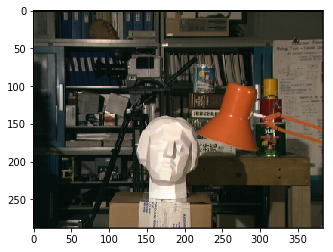

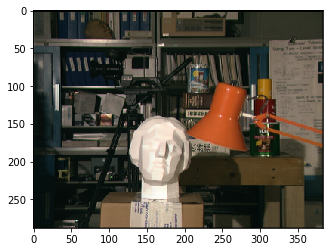

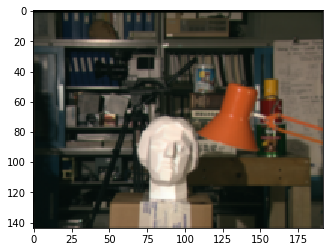

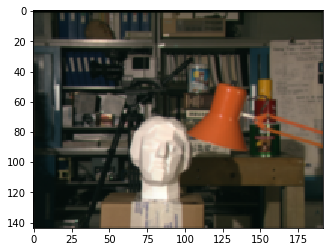

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


img_01 = cv2.imread('tsukuba/scene1.row3.col1.ppm')
img_02 = cv2.imread('tsukuba/scene1.row3.col2.ppm')
img_01 = cv2.cvtColor(img_01,cv2.COLOR_BGR2RGB)
img_02 = cv2.cvtColor(img_02,cv2.COLOR_BGR2RGB)

img_01down = cv2.pyrDown(img_01)
img_02down = cv2.pyrDown(img_02)
#img_01down = cv2.cvtColor(img_01down,cv2.COLOR_BGR2RGB)
#img_02down = cv2.cvtColor(img_02down,cv2.COLOR_BGR2RGB)

plt.imshow(img_01)
plt.show()

plt.imshow(img_02)
plt.show()

plt.imshow(img_01down)
plt.show()

plt.imshow(img_02down)
plt.show()

# Stereo Correspondence Based on Normalized Cross-Correlation

In [17]:
def pextract(img, y):
    patch = np.empty_like(patch0)
    patches = np.empty_like(patches0)
    for x in range(0, ish[1]):
        a = img[y:y+windowsize,x:x+windowsize,:]
        a=((a[:,:,0]+a[:,:,1]+a[:,:,2])/3).reshape(length)
        patch = (a - np.mean(a)) / np.std(a)
        patches[x] = patch
    return patches

def pextract_lum(img, y):
    patch = np.empty_like(patch0)
    patches = np.empty_like(patches0)
    for x in range(0, ish[1]):
        a = img[y:y+windowsize,x:x+windowsize,:]
        a=(a[:,:,0]*0.3+a[:,:,1]*0.6+a[:,:,2]*0.1).reshape(length)
        patch = (a - np.mean(a)) / np.std(a)
        patches[x] = patch
    return patches

def hpatches(img1, img2, y, mode='intensity'):
    padded1= cv2.copyMakeBorder(img1,pad,pad,pad,pad,cv2.BORDER_CONSTANT)
    padded2= cv2.copyMakeBorder(img2,pad,pad,pad,pad,cv2.BORDER_CONSTANT)
    
    if mode == 'intensity':
        patches1 = pextract(padded1, y)
        patches2 = pextract(padded2, y)
    elif mode == 'luminance':
        patches1 = pextract_lum(padded1, y)
        patches2 = pextract_lum(padded2, y)
    
    return patches1, patches2

def correspondence(img1,img2, wsize = 5, mode='intensity'):
    start = time.clock() 
    global windowsize
    windowsize = wsize
    global pad
    pad = (windowsize-1)//2
    global length
    length = windowsize**2
    global ish
    ish = img1.shape
    global psh
    psh = (img1.shape[0]+2*pad,img1.shape[1]+2*pad)
    global patch0
    patch0 = np.empty((windowsize,windowsize))
    global patches0
    patches0 = np.empty((psh[1]-windowsize+1, length))
    result = np.zeros((ish[0], ish[1]))
    result_nonsqrd = np.zeros((ish[0], ish[1]))
    for y in range(ish[0]):
        #print(y)
        patches1, patches2 = hpatches(img1, img2, y, mode)
        for x in range(ish[1]):
            #normalized cross-correlation
            best = -999
            #pa = patches1[x]
            #a = pa / (np.std(pa) * len(pa))
            r = [0, patches2.shape[0]]
            rr = ish[1]//25 #limits search range
            if x - rr > 0:
                r[0] = x - rr
            if x + rr < ish[1]:
                r[1] = x + rr
            for h in range(r[0],r[1]):
                #b = patches2[h] / patches2[h]
                ncc = np.correlate(patches1[x]/length, patches2[h]) 
                if ncc > best:
                    best = ncc
                    besth =h
            result[y,x]=abs(x-besth)**2
            result_nonsqrd[y,x]=x-besth
            #print(best,ncc, x,y,h, besth)
    elapsed = time.clock()
    elapsed = elapsed - start
    print ("Done. Time spent executing correspondence: ", elapsed)
    return result, result_nonsqrd


result, result_nonsqrd = correspondence(img_01, img_02, 7)
#result = correspondence(img_01down, img_02down, 7)

Done. Time spent executing correspondence:  25.55197607322407


Done. Time spent executing correspondence:  35.02936613343081


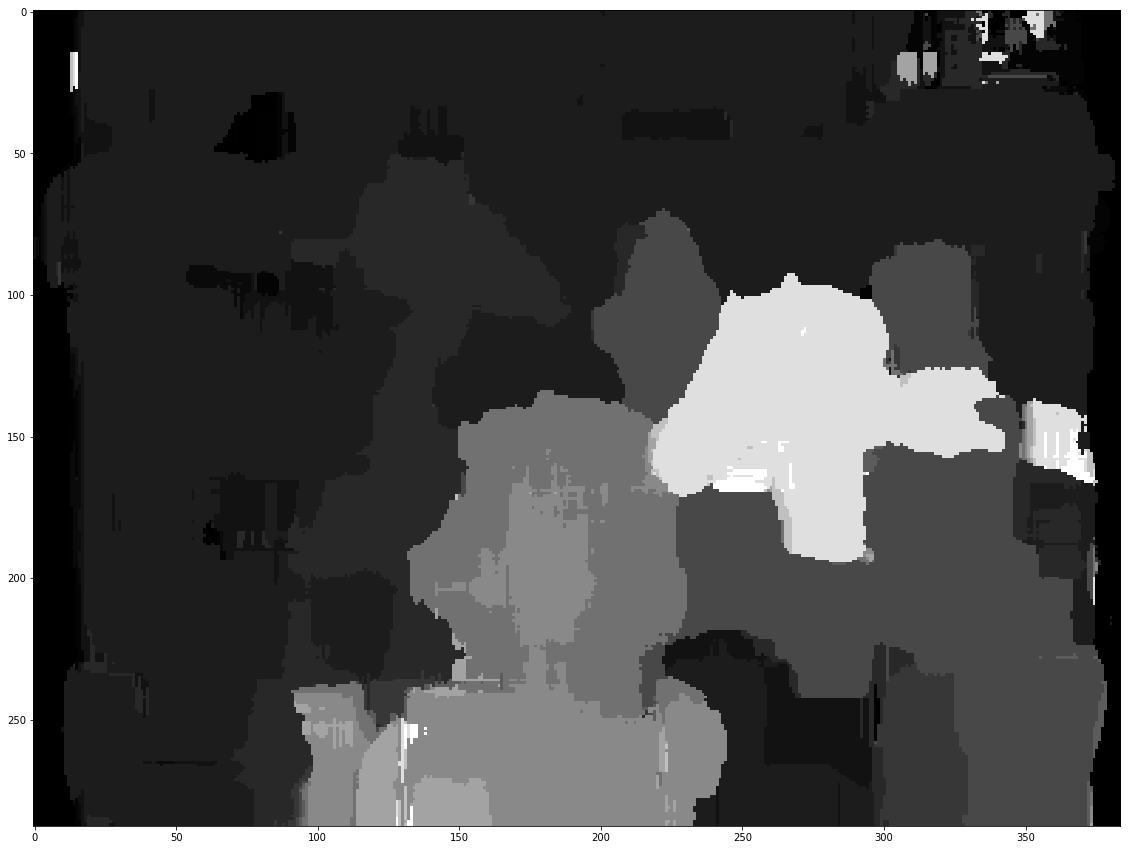

In [28]:
result, result_nonsqrd = correspondence(img_01, img_02, 5)
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.imshow(result, "gray")
plt.show()

Done. Time spent executing correspondence:  25.77670834419405


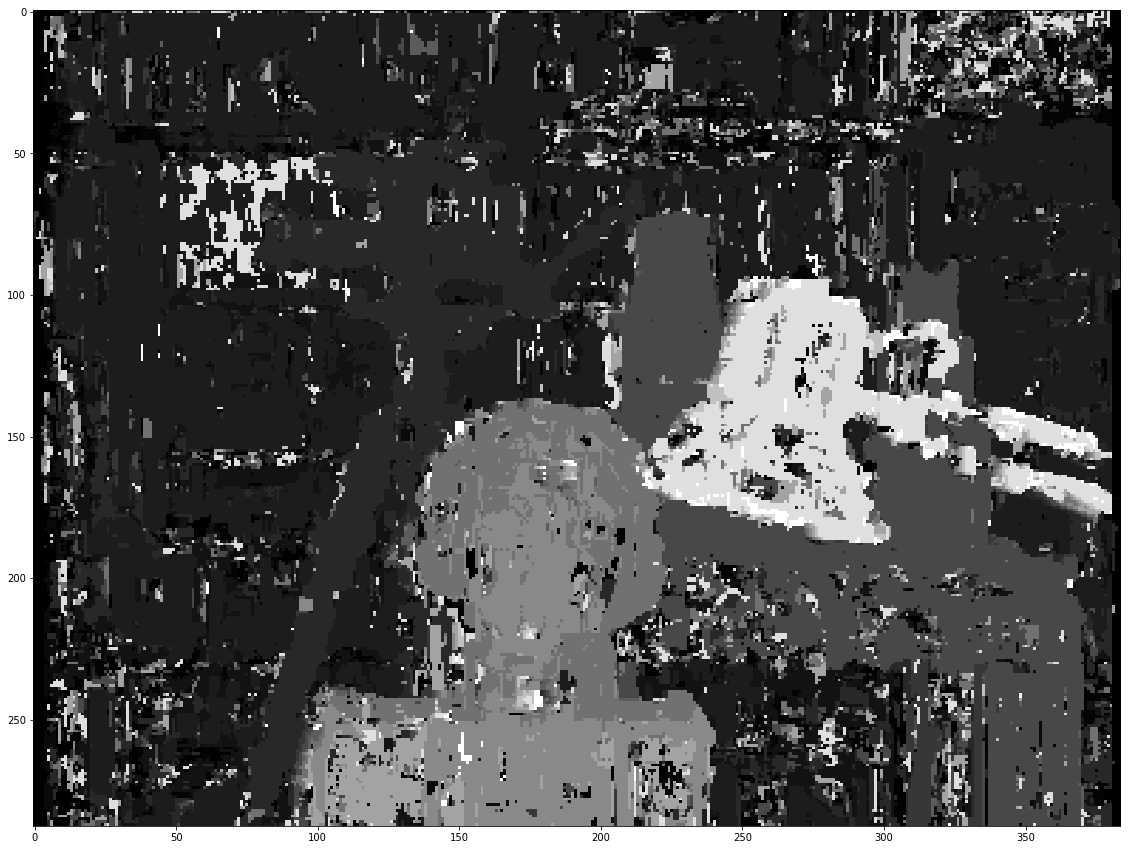

error: C:\bld\opencv_1510966172919\work\opencv-3.3.0\modules\imgcodecs\src\loadsave.cpp:604: error: (-2) could not find a writer for the specified extension in function cv::imwrite_


In [23]:
result, result_nonsqrd = correspondence(img_01, img_02, 5, 'luminance')
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.imshow(result, "gray")
plt.show()

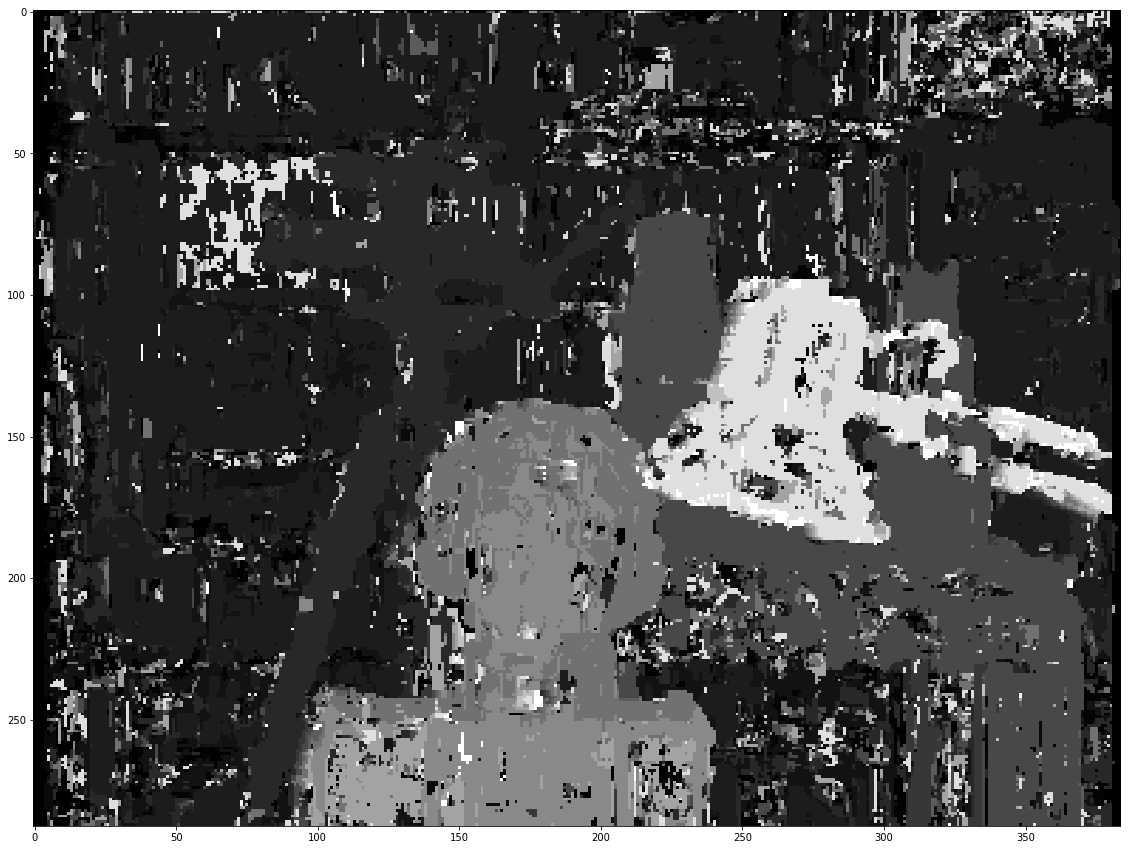

In [22]:
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.imshow(result, "gray")
plt.show()
#print(result)

Done. Time spent executing correspondence:  4.8244524415877095


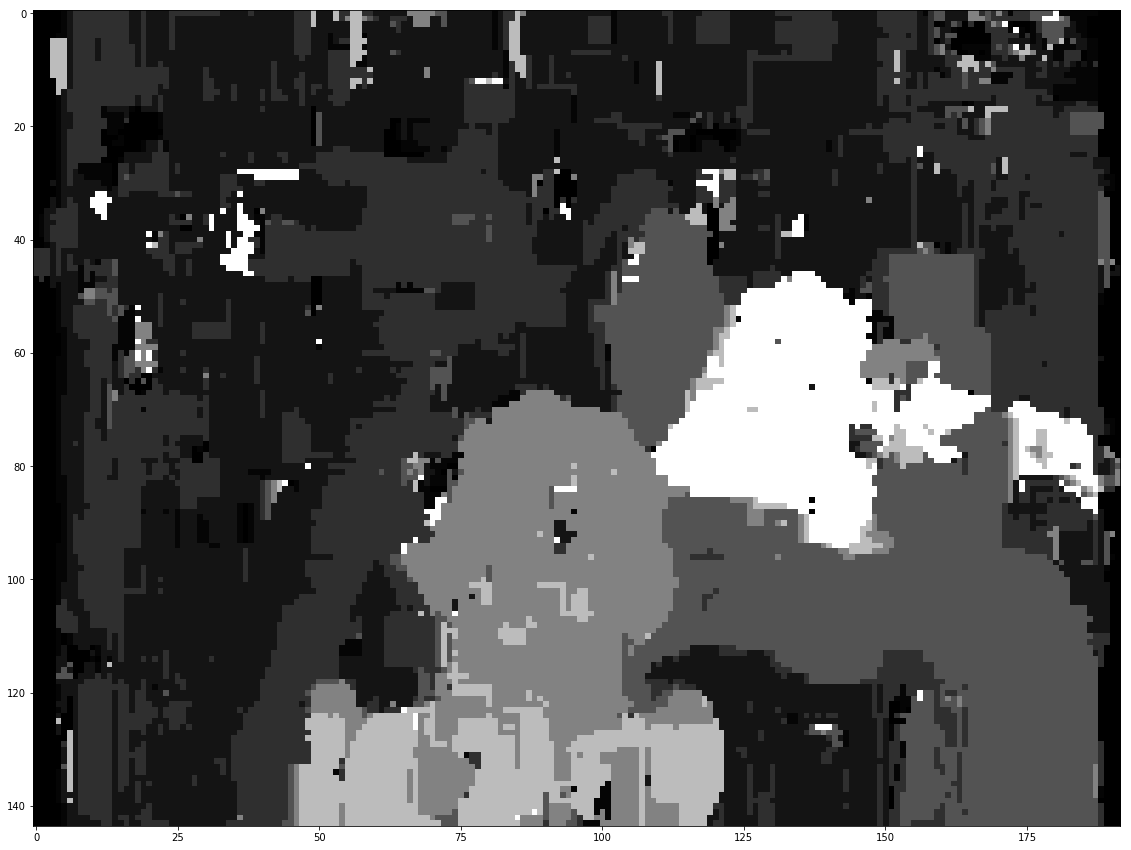

In [4]:
result = correspondence(img_01down, img_02down, 7)
plt.imshow(result, "gray")
plt.show()

array([   0.,    0.,    0.,    0.,  169.,  169.,    0.,    1.,  100.,
         64.,    0.,   25.,   25.,   16.,   16.,   36.,   25.,   25.,
         25.,   25.,   25.,   25.,   16.,   36.,   36.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,   25.,
         25.,   25.,   25.,   25.,   25.,   16.,   16.,    4.,    4.,
         25.,   25.,   25.,   81.,   25.,   64.,   25.,   25.,   25.,
         25.,   25.,